In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Crop_recommendation.csv')
df = pd.read_csv('C:/xampp/htdocs/crop-management-system-main/ML/crop_recommendation/Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.shape

(2200, 8)

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
s = df.corr()
print(s)

ValueError: could not convert string to float: 'rice'

In [14]:
sns.heatmap(s,annot = True)

NameError: name 's' is not defined

In [15]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']

In [16]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)

**DECISION TREE**

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))

Decision Tree's accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [20]:
score = cross_val_score(DecisionTree,features,target,cv = 5)

In [21]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

**NAIVE BAYES(GAUSSIAN)**

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))

Naive Bayes accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

In [24]:
score = cross_val_score(Naive_Bayes,features,target,cv = 5)

In [25]:
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

**LOGISTIC REGRESSION**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.

In [28]:
score = cross_val_score(LogReg,features,target,cv = 5)

In [29]:
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

**K-Nearest Neighbors(KNN)**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predicted = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

KNN Accuracy is:  97.5
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
    

In [32]:
score = cross_val_score(KNN,features,target,cv = 5)

In [33]:
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

**RANDOM FOREST**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy', random_state=0)
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [36]:
score = cross_val_score(RF,features,target,cv = 5)

In [37]:
score

array([0.99772727, 0.99090909, 0.99545455, 0.99318182, 0.98636364])

**XG BOOST**

In [38]:
import xgboost as xgb

In [39]:
XB = xgb.XGBClassifier(eval_metric='mlogloss')
XB.fit(X_train,y_train)
predicted = XB.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('XG Boost Accuracy is ',x * 100)
print(classification_report(y_test,predicted))

XG Boost Accuracy is  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.

In [40]:
score = cross_val_score(XB,features,target,cv = 5)

In [41]:
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

**ACCURACY COMPARISION**

<AxesSubplot:title={'center':'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

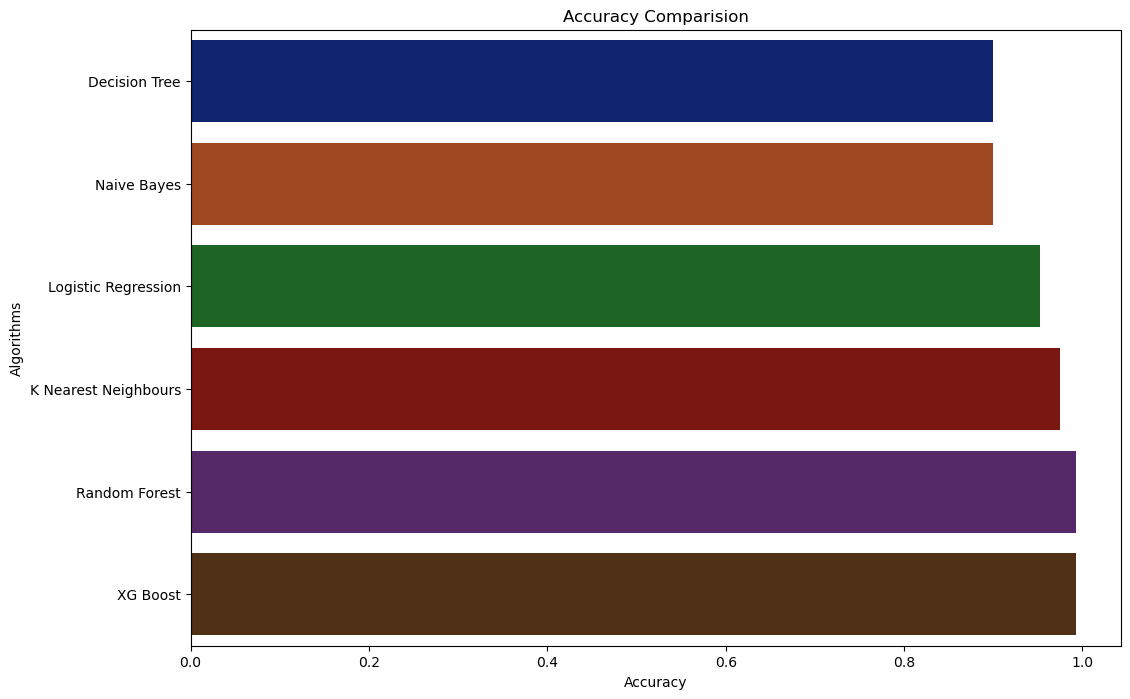

In [42]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [43]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

Decision Tree --> 90.0 %
Naive Bayes --> 90.0 %
Logistic Regression --> 95.22727272727273 %
K Nearest Neighbours --> 97.5 %
Random Forest --> 99.31818181818181 %
XG Boost --> 99.31818181818181 %


**PREDICTION**

In [44]:
data = np.array([[90, 42, 43, 20,82, 6.50, 202.9]])
prediction = RF.predict(data)
print(prediction)

['rice']


**CONCLUSION**

We are using Random Forest because of its accuracy and precision.